In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as corr

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [3]:
gdrive_data_parent_dir = '/mnt/mydrive/TUAN/Neuro-Visual'
eeg_parent_dir = '/mnt/mydrive/TUAN/Neuro-Visual'

In [4]:
eeg_parent_dir = os.path.join(gdrive_data_parent_dir, 'eeg_dataset',
    'preprocessed_data', 'sub-01')
eeg_data_train = np.load(os.path.join(eeg_parent_dir,
    'preprocessed_eeg_training.npy'), allow_pickle=True).item()
eeg_data_test = np.load(os.path.join(eeg_parent_dir,
    'preprocessed_eeg_test.npy'), allow_pickle=True).item()

print('Training EEG data shape:')
print(eeg_data_train['preprocessed_eeg_data'].shape)
print('(Training image conditions × Training EEG repetitions × EEG channels × '
    'EEG time points)')

print('\nTest EEG data shape:')
print(eeg_data_test['preprocessed_eeg_data'].shape)
print('(Test image conditions × Test EEG repetitions × EEG channels × '
    'EEG time points)')

print('\nEEG channels:')
for c,chan in enumerate(eeg_data_train['ch_names']):
    print(c, chan)

print('\nEEG time points (in seconds):')
for t,time in enumerate(eeg_data_train['times']):
    print(t, np.round(time, decimals=2))

Training EEG data shape:
(16540, 4, 17, 100)
(Training image conditions × Training EEG repetitions × EEG channels × EEG time points)

Test EEG data shape:
(200, 80, 17, 100)
(Test image conditions × Test EEG repetitions × EEG channels × EEG time points)

EEG channels:
0 Pz
1 P3
2 P7
3 O1
4 Oz
5 O2
6 P4
7 P8
8 P1
9 P5
10 PO7
11 PO3
12 POz
13 PO4
14 PO8
15 P6
16 P2

EEG time points (in seconds):
0 -0.2
1 -0.19
2 -0.18
3 -0.17
4 -0.16
5 -0.15
6 -0.14
7 -0.13
8 -0.12
9 -0.11
10 -0.1
11 -0.09
12 -0.08
13 -0.07
14 -0.06
15 -0.05
16 -0.04
17 -0.03
18 -0.02
19 -0.01
20 0.0
21 0.01
22 0.02
23 0.03
24 0.04
25 0.05
26 0.06
27 0.07
28 0.08
29 0.09
30 0.1
31 0.11
32 0.12
33 0.13
34 0.14
35 0.15
36 0.16
37 0.17
38 0.18
39 0.19
40 0.2
41 0.21
42 0.22
43 0.23
44 0.24
45 0.25
46 0.26
47 0.27
48 0.28
49 0.29
50 0.3
51 0.31
52 0.32
53 0.33
54 0.34
55 0.35
56 0.36
57 0.37
58 0.38
59 0.39
60 0.4
61 0.41
62 0.42
63 0.43
64 0.44
65 0.45
66 0.46
67 0.47
68 0.48
69 0.49
70 0.5
71 0.51
72 0.52
73 0.53
74 0.54
7

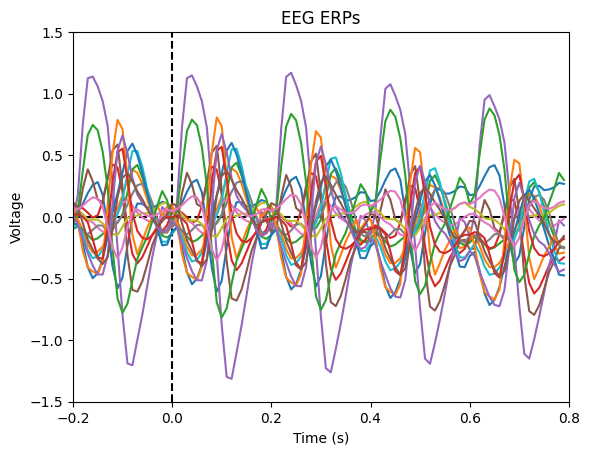

In [5]:
erp_data_train = np.mean(eeg_data_train['preprocessed_eeg_data'], 1)
erp_data_test = np.mean(eeg_data_test['preprocessed_eeg_data'], 1)
erp_data_all = np.mean(np.append(erp_data_train, erp_data_test, 0), 0)

plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1.5, 1.5], 'k--')
plt.plot(eeg_data_train['times'], np.transpose(erp_data_all));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage');
plt.ylim(bottom=-1.5, top=1.5)
plt.title('EEG ERPs');

In [6]:
img_parent_dir  = os.path.join(gdrive_data_parent_dir, 'image_set')
img_metadata = np.load(os.path.join(img_parent_dir, 'image_metadata.npy'),
	allow_pickle=True).item()

n_train_img = len(img_metadata['train_img_concepts'])
n_train_concepts = len(np.unique(img_metadata['train_img_concepts']))
n_train_img_per_concept = int(n_train_img / n_train_concepts)
print('Training images: ' + str(n_train_img))
print('Image concepts: ' + str(n_train_concepts))
print('Images per concept: '+ str(n_train_img_per_concept))

n_test_img = len(img_metadata['test_img_concepts'])
n_test_concepts = len(np.unique(img_metadata['test_img_concepts']))
n_test_img_per_concept = int(n_test_img / n_test_concepts)
print('\nTest images: ' + str(n_test_img))
print('Image concepts: ' + str(n_test_concepts))
print('Images per concept: '+ str(n_test_img_per_concept))

Training images: 16540
Image concepts: 1654
Images per concept: 10

Test images: 200
Image concepts: 200
Images per concept: 1


Training EEG single image data shape:
(4, 17, 100)
(Training EEG repetitions × EEG channels × EEG time points)



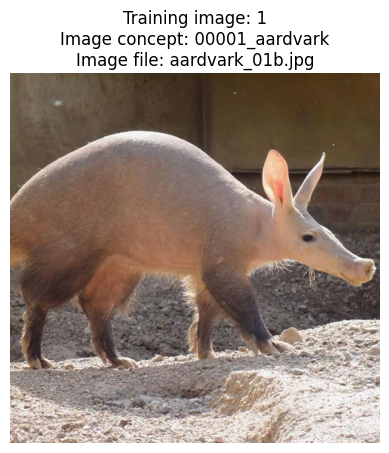

In [7]:
train_img_idx =  0 #@param {type:"integer"}

eeg_data_single_image = eeg_data_train['preprocessed_eeg_data'][train_img_idx]
print('Training EEG single image data shape:')
print(eeg_data_single_image.shape)
print('(Training EEG repetitions × EEG channels × EEG time points)\n')

train_img_dir = os.path.join(img_parent_dir, 'training_images',
	img_metadata['train_img_concepts'][train_img_idx],
	img_metadata['train_img_files'][train_img_idx])
train_img = Image.open(train_img_dir).convert('RGB')

plt.figure()
plt.axis('off')
plt.imshow(train_img)
plt.title('Training image: ' + str(train_img_idx+1) + '\nImage concept: ' +\
	img_metadata['train_img_concepts'][train_img_idx] + '\nImage file: ' +\
	img_metadata['train_img_files'][train_img_idx]);

Test EEG single image data shape:
(80, 17, 100)
(Test EEG repetitions × EEG channels × EEG time points)



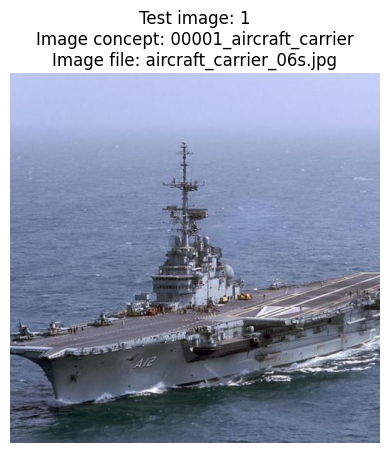

In [8]:
test_img_idx =  0 #@param {type:"integer"}

eeg_data_single_image = eeg_data_test['preprocessed_eeg_data'][train_img_idx]
print('Test EEG single image data shape:')
print(eeg_data_single_image.shape)
print('(Test EEG repetitions × EEG channels × EEG time points)\n')

test_img_dir = os.path.join(img_parent_dir, 'test_images',
	img_metadata['test_img_concepts'][test_img_idx],
	img_metadata['test_img_files'][test_img_idx])
test_img = Image.open(test_img_dir).convert('RGB')

plt.figure()
plt.axis('off')
plt.imshow(test_img)
plt.title('Test image: ' + str(test_img_idx+1) + '\nImage concept: ' +\
	img_metadata['test_img_concepts'][test_img_idx] + '\nImage file: ' +\
	img_metadata['test_img_files'][test_img_idx]);

In [9]:
img_parent_dir  = os.path.join(gdrive_data_parent_dir, 'image_set')
img_metadata = np.load(os.path.join(img_parent_dir, 'image_metadata.npy'),allow_pickle=True).item()

n_train_img = len(img_metadata['train_img_concepts'])
n_train_concepts = len(np.unique(img_metadata['train_img_concepts']))
n_train_img_per_concept = int(n_train_img / n_train_concepts)
print('Training images: ' + str(n_train_img))
print('Image concepts: ' + str(n_train_concepts))
print('Images per concept: '+ str(n_train_img_per_concept))

n_test_img = len(img_metadata['test_img_concepts'])
n_test_concepts = len(np.unique(img_metadata['test_img_concepts']))
n_test_img_per_concept = int(n_test_img / n_test_concepts)
print('\nTest images: ' + str(n_test_img))
print('Image concepts: ' + str(n_test_concepts))
print('Images per concept: '+ str(n_test_img_per_concept))

Training images: 16540
Image concepts: 1654
Images per concept: 10

Test images: 200
Image concepts: 200
Images per concept: 1


In [10]:

training_images = []
for i in range(n_train_img):
    img_path = os.path.join(
        img_parent_dir,
        'training_images',
        img_metadata['train_img_concepts'][i],
        img_metadata['train_img_files'][i]
    )
    try:
        img = Image.open(img_path).convert('RGB')
        training_images.append(img)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")


eeg_signals = eeg_data_train['preprocessed_eeg_data']  

print("Number of training images:", len(training_images))
print("Number of EEG trials:", eeg_signals.shape[0])


for image, eeg_signal in zip(training_images[:2], eeg_signals[:2]):
    image_array = np.array(image)
    print(f"Image info: {type(image)} with shape {image_array.shape}, EEG signal shape: {eeg_signal.shape}")


Number of training images: 16540
Number of EEG trials: 16540
Image info: <class 'PIL.Image.Image'> with shape (500, 500, 3), EEG signal shape: (4, 17, 100)
Image info: <class 'PIL.Image.Image'> with shape (500, 500, 3), EEG signal shape: (4, 17, 100)


In [11]:
import os
import numpy as np
if not hasattr(np, 'object'):
    np.object = object
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),               # Converts image to [0, 1]
    transforms.Lambda(lambda x: x * 2 - 1) # Normalize to [-1, 1]
])

class EEGImageDataset(Dataset):
    def __init__(self, images, eeg_signals, transform=None):
        self.images = images
        self.eeg_signals = eeg_signals
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        eeg_signal = self.eeg_signals[idx]
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
            image = image * 2 - 1  # Normalize to [-1,1]
        
        eeg_signal = torch.tensor(eeg_signal, dtype=torch.float32)
        return eeg_signal, image

/tmp/ipykernel_2616673/4254811706.py:3: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'object'):


In [12]:
dataset = EEGImageDataset(training_images, eeg_signals, transform=image_transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [13]:
class Generator(nn.Module):
    def __init__(self, eeg_input_shape=(4, 17, 100), latent_dim=256, output_channels=3):
        super(Generator, self).__init__()
        # Flattened EEG dimension: 4 * 17 * 100 = 6800
        self.eeg_flatten_dim = np.prod(eeg_input_shape)
        
        
        self.fc = nn.Sequential(
            nn.Linear(self.eeg_flatten_dim, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU(True),
            nn.Linear(latent_dim, 8 * 8 * 128),
            nn.BatchNorm1d(8 * 8 * 128),
            nn.ReLU(True),
        )
        
        
        def upsample_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Upsample(scale_factor=2, mode='nearest'),
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(True)
            )
        
        
        self.net = nn.Sequential(
            # Starting with a feature map of shape (128, 8, 8)
            upsample_block(128, 64),  # -> (64, 16, 16)
            upsample_block(64, 32),   # -> (32, 32, 32)
            upsample_block(32, 16),   # -> (16, 64, 64)
            # Final convolution to get the desired number of output channels.
            nn.Conv2d(16, output_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()  # Output in range [-1, 1]
        )
        
    def forward(self, x):
        batch_size = x.size(0)
        # Flatten the EEG input.
        x = x.view(batch_size, -1)  # shape: (batch_size, 6800)
        x = self.fc(x)              # shape: (batch_size, 8*8*128)
        x = x.view(batch_size, 128, 8, 8)
        img = self.net(x)           # shape: (batch_size, output_channels, 64, 64)
        return img


In [14]:
class ResidualUpsampleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualUpsampleBlock, self).__init__()
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # For the skip connection, if in_channels != out_channels, we use a 1x1 conv.
        self.skip_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1) if in_channels != out_channels else nn.Identity()
    
    def forward(self, x):
        # Upsample the input
        skip = self.upsample(x)
        skip = self.skip_conv(skip)
        
        out = self.upsample(x)
        out = self.conv1(out)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Add skip connection and activate.
        out = out + skip
        out = self.relu(out)
        return out

class GeneratorWithSkip(nn.Module):
    def __init__(self, eeg_input_shape=(4, 17, 100), latent_dim=256, output_channels=3):
        super(GeneratorWithSkip, self).__init__()
        # Flattened EEG dimension: 4 * 17 * 100 = 6800
        self.eeg_flatten_dim = np.prod(eeg_input_shape)
        
       
        self.fc = nn.Sequential(
            nn.Linear(self.eeg_flatten_dim, latent_dim),
            nn.BatchNorm1d(latent_dim),
            nn.ReLU(True),
            nn.Linear(latent_dim, 8 * 8 * 128),
            nn.BatchNorm1d(8 * 8 * 128),
            nn.ReLU(True),
        )
        # After the FC layers reshape to (128, 8, 8)
        
       
        self.up1 = ResidualUpsampleBlock(128, 64)   # -> (64, 16, 16)
        self.up2 = ResidualUpsampleBlock(64, 32)    # -> (32, 32, 32)
        self.up3 = ResidualUpsampleBlock(32, 16)    # -> (16, 64, 64)
        
        
        self.final_conv = nn.Conv2d(16, output_channels, kernel_size=3, stride=1, padding=1)
        self.tanh = nn.Tanh()  # Output in [-1, 1]
        
    def forward(self, x):
        batch_size = x.size(0)
        # Flatten and convert EEG signal to latent representation.
        x = x.view(batch_size, -1)
        x = self.fc(x)
        
        x = x.view(batch_size, 128, 8, 8)
        
        x = self.up1(x)
        x = self.up2(x)
        x = self.up3(x)
        
        x = self.final_conv(x)
        img = self.tanh(x)
        return img

In [15]:
class Discriminator(nn.Module):
    def __init__(self, input_channels=3):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=4, stride=2, padding=1),  # -> (16, 32, 32)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=1),              # -> (32, 16, 16)
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),              # -> (64, 8, 8)
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),             # -> (128, 4, 4)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1),
            nn.Sigmoid()  # Output probability (real or fake)
        )
        
    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv(x)
        x = x.view(batch_size, -1)
        validity = self.fc(x)
        return validity


Epoch [1/100] Batch [0/259] D Loss: 1455.7645 G Loss: 3571.0862 (Adv: 0.8361, Rec: 0.3570)
Epoch [1/100] Batch [100/259] D Loss: 4.6048 G Loss: 2683.1873 (Adv: 6.8622, Rec: 0.2676)
Epoch [1/100] Batch [200/259] D Loss: 1.0516 G Loss: 2636.6238 (Adv: 8.3380, Rec: 0.2628)


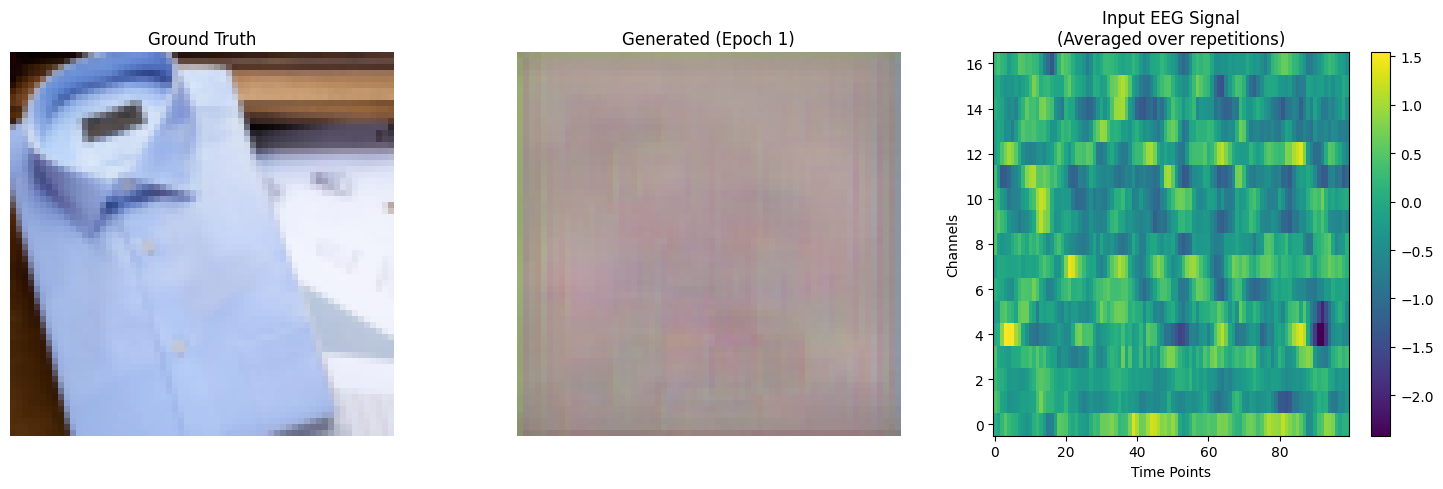

Epoch [2/100] Batch [0/259] D Loss: 0.7486 G Loss: 2348.7839 (Adv: 9.2362, Rec: 0.2340)
Epoch [2/100] Batch [100/259] D Loss: 1.0495 G Loss: 2542.8799 (Adv: 8.0673, Rec: 0.2535)
Epoch [2/100] Batch [200/259] D Loss: 0.5303 G Loss: 2447.8657 (Adv: 10.3833, Rec: 0.2437)


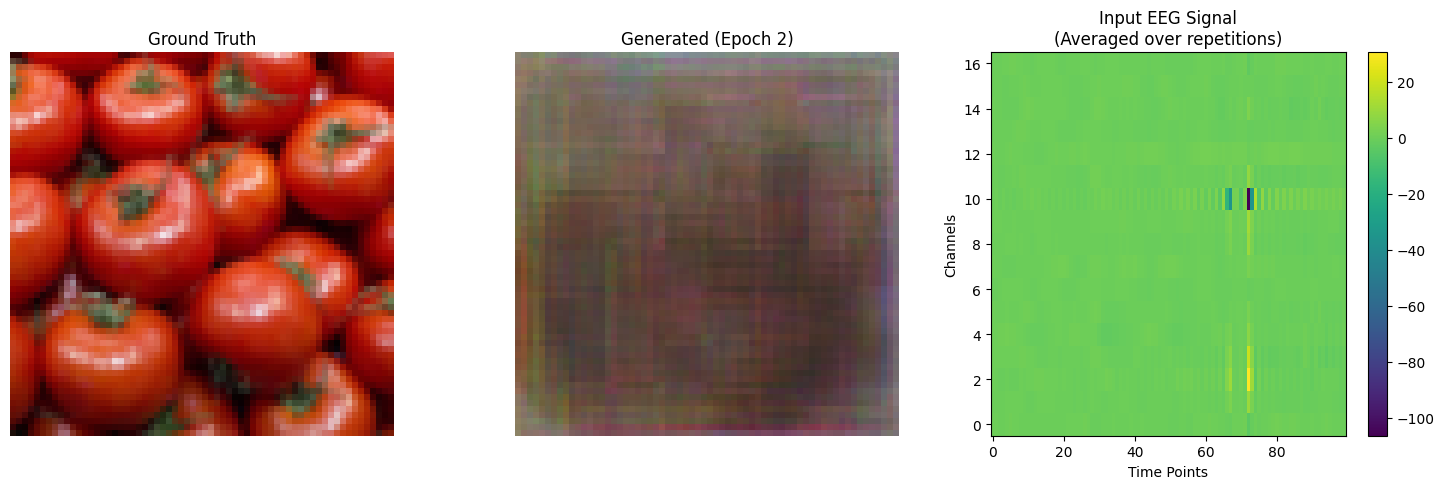

Epoch [3/100] Batch [0/259] D Loss: 0.2232 G Loss: 2238.9624 (Adv: 9.8181, Rec: 0.2229)
Epoch [3/100] Batch [100/259] D Loss: 0.2267 G Loss: 2379.2566 (Adv: 10.4028, Rec: 0.2369)
Epoch [3/100] Batch [200/259] D Loss: 0.1434 G Loss: 2269.3203 (Adv: 10.1004, Rec: 0.2259)


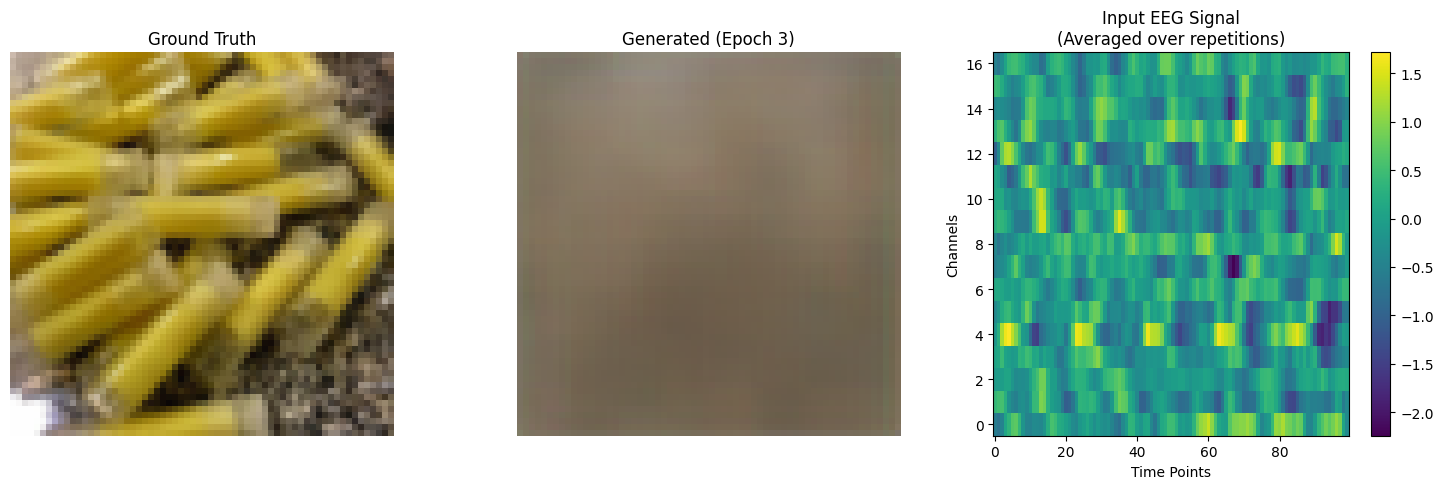

Epoch [4/100] Batch [0/259] D Loss: 0.1834 G Loss: 1807.9677 (Adv: 10.3687, Rec: 0.1798)
Epoch [4/100] Batch [100/259] D Loss: 0.1478 G Loss: 1917.8167 (Adv: 10.4361, Rec: 0.1907)
Epoch [4/100] Batch [200/259] D Loss: 0.0818 G Loss: 2085.1101 (Adv: 10.8791, Rec: 0.2074)


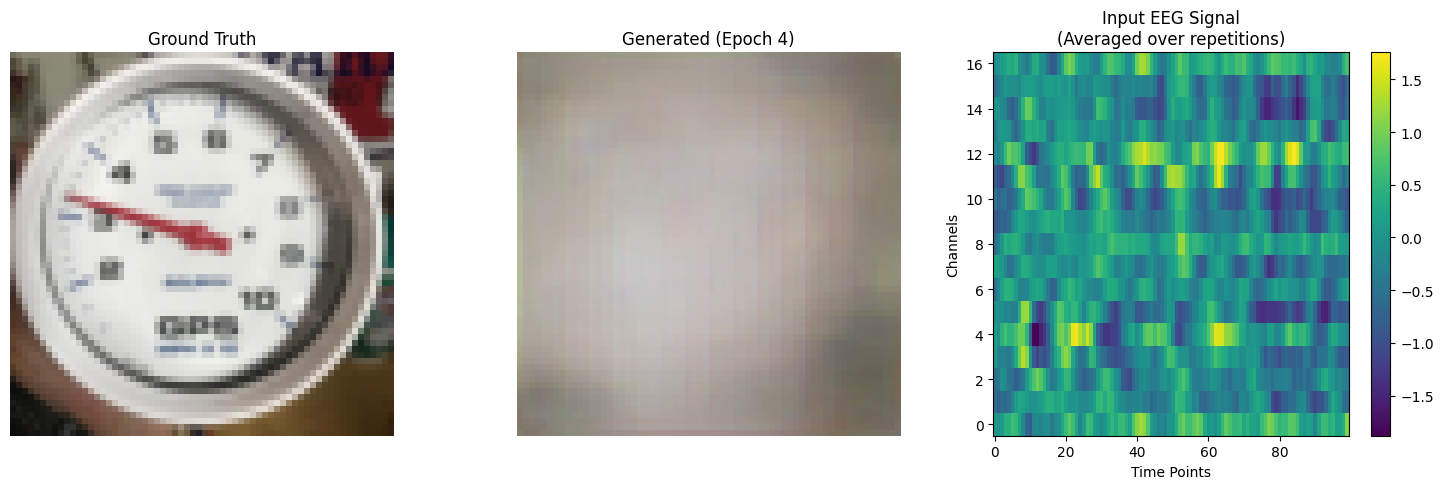

Epoch [5/100] Batch [0/259] D Loss: 0.1184 G Loss: 1827.0214 (Adv: 11.1714, Rec: 0.1816)
Epoch [5/100] Batch [100/259] D Loss: 0.0519 G Loss: 2033.6094 (Adv: 11.6917, Rec: 0.2022)
Epoch [5/100] Batch [200/259] D Loss: 0.0768 G Loss: 1776.2416 (Adv: 11.4195, Rec: 0.1765)


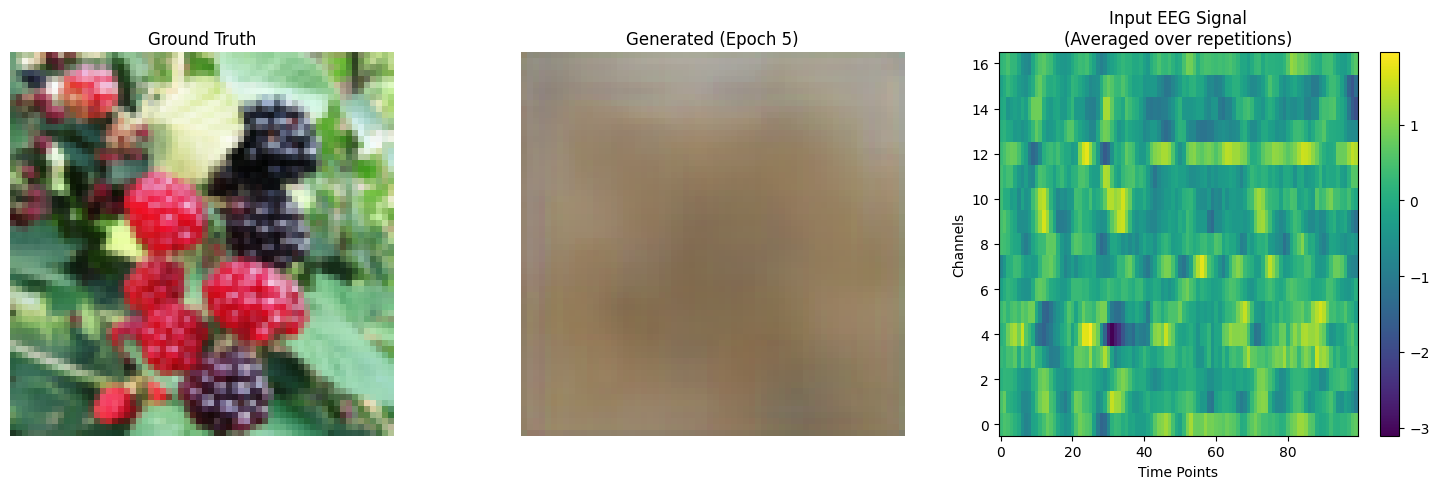

Epoch [6/100] Batch [0/259] D Loss: 0.0491 G Loss: 1713.7095 (Adv: 11.8535, Rec: 0.1702)
Epoch [6/100] Batch [100/259] D Loss: 0.0987 G Loss: 1624.3821 (Adv: 10.7941, Rec: 0.1614)
Epoch [6/100] Batch [200/259] D Loss: 0.0490 G Loss: 1809.6444 (Adv: 11.8243, Rec: 0.1798)


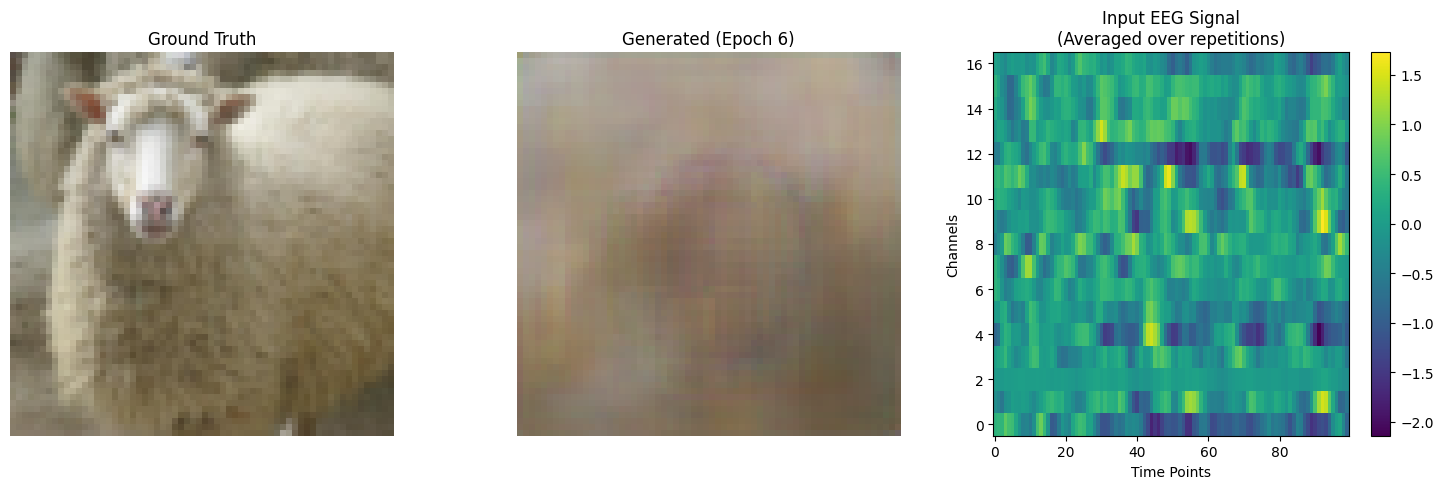

Epoch [7/100] Batch [0/259] D Loss: 0.0776 G Loss: 1530.4972 (Adv: 11.6665, Rec: 0.1519)
Epoch [7/100] Batch [100/259] D Loss: 0.1086 G Loss: 1466.1752 (Adv: 12.3324, Rec: 0.1454)
Epoch [7/100] Batch [200/259] D Loss: 0.0539 G Loss: 1652.2632 (Adv: 11.4142, Rec: 0.1641)


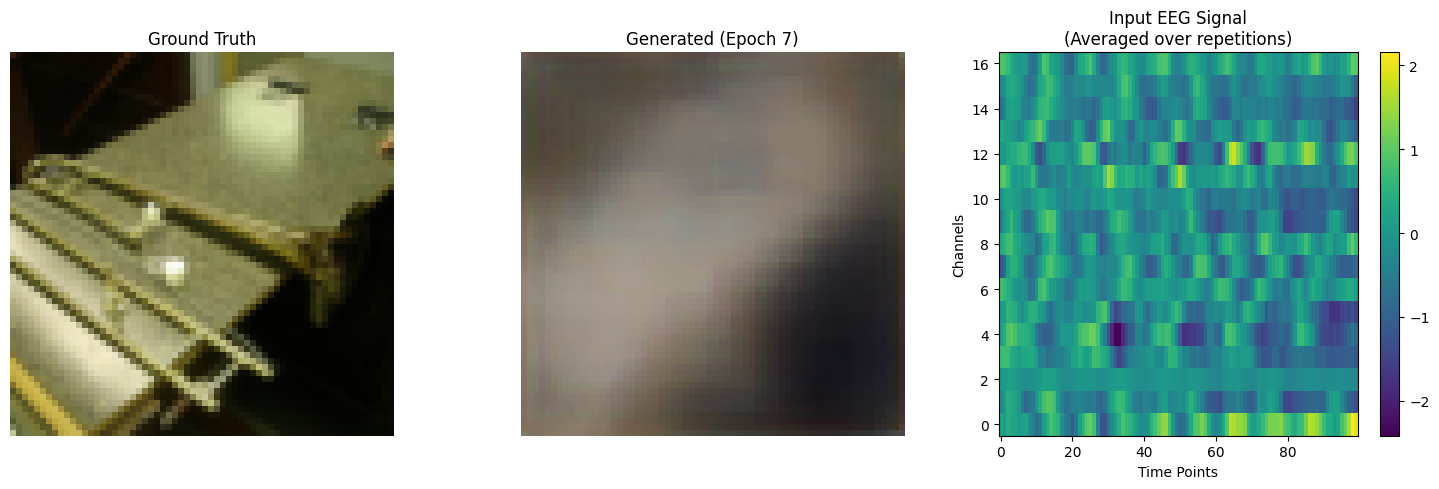

Epoch [8/100] Batch [0/259] D Loss: 0.0429 G Loss: 1498.0912 (Adv: 12.2920, Rec: 0.1486)
Epoch [8/100] Batch [100/259] D Loss: 0.1066 G Loss: 1530.1696 (Adv: 11.5763, Rec: 0.1519)
Epoch [8/100] Batch [200/259] D Loss: 0.0436 G Loss: 1449.8334 (Adv: 11.5945, Rec: 0.1438)


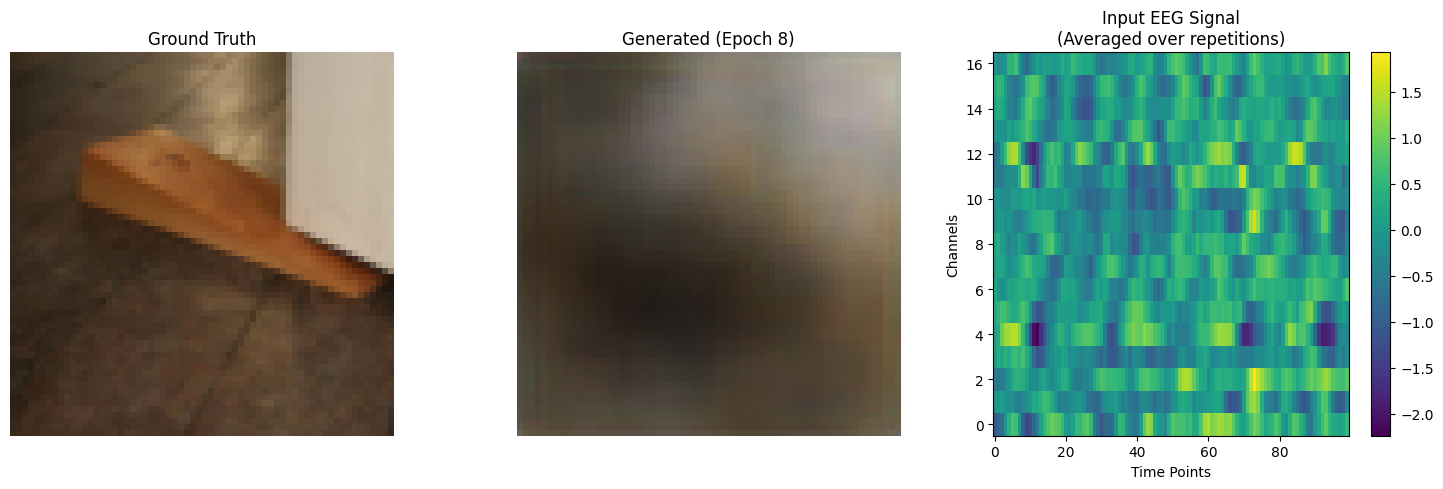

Epoch [9/100] Batch [0/259] D Loss: 0.0140 G Loss: 1342.0326 (Adv: 13.2842, Rec: 0.1329)
Epoch [9/100] Batch [100/259] D Loss: 0.0702 G Loss: 1242.6487 (Adv: 12.4425, Rec: 0.1230)
Epoch [9/100] Batch [200/259] D Loss: 0.0182 G Loss: 1394.7979 (Adv: 12.8295, Rec: 0.1382)


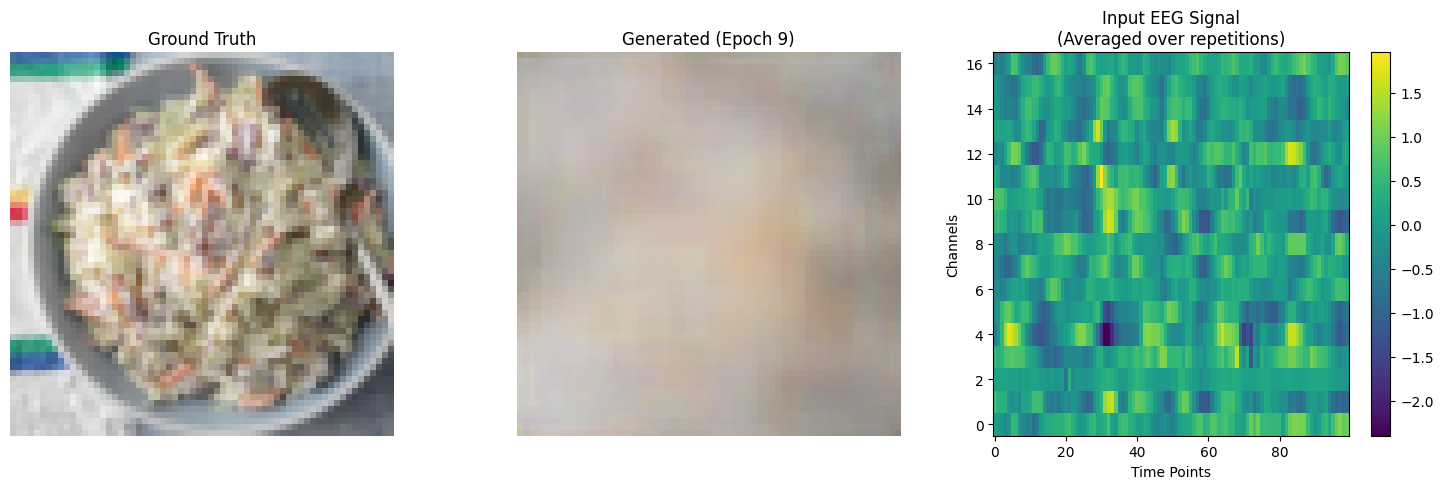

Epoch [10/100] Batch [0/259] D Loss: 0.0166 G Loss: 1372.0256 (Adv: 12.3948, Rec: 0.1360)
Epoch [10/100] Batch [100/259] D Loss: 0.0667 G Loss: 1166.8689 (Adv: 12.1695, Rec: 0.1155)
Epoch [10/100] Batch [200/259] D Loss: 0.0264 G Loss: 1326.8707 (Adv: 12.3782, Rec: 0.1314)


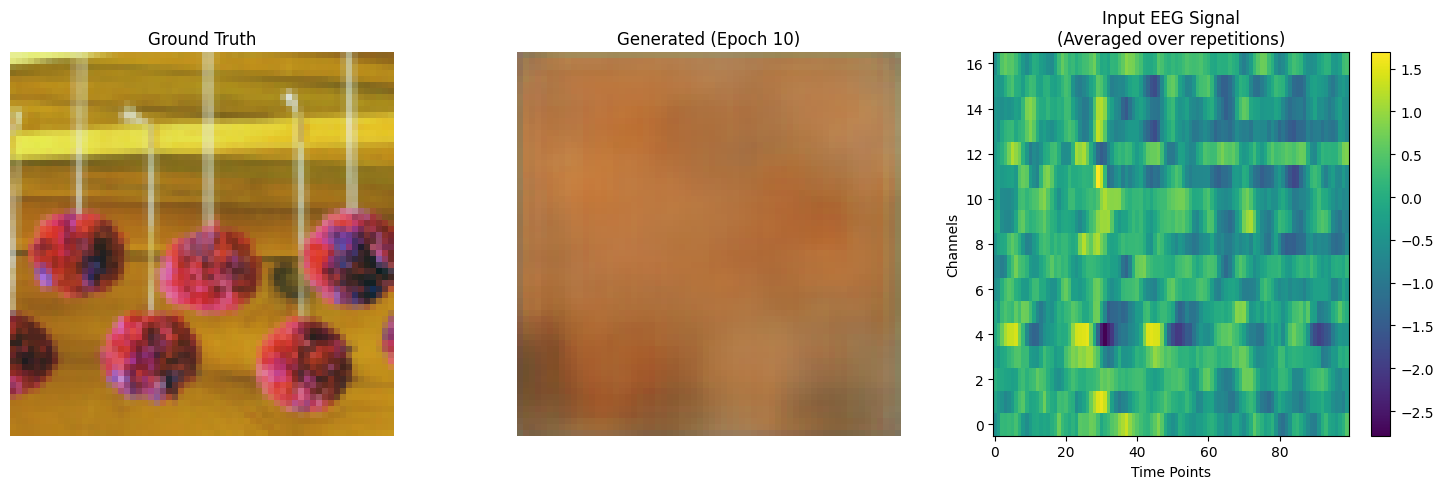

Epoch [11/100] Batch [0/259] D Loss: 0.0149 G Loss: 1166.4606 (Adv: 12.5659, Rec: 0.1154)
Epoch [11/100] Batch [100/259] D Loss: 0.0144 G Loss: 1390.4467 (Adv: 12.7220, Rec: 0.1378)
Epoch [11/100] Batch [200/259] D Loss: 0.0440 G Loss: 1296.2781 (Adv: 11.1064, Rec: 0.1285)


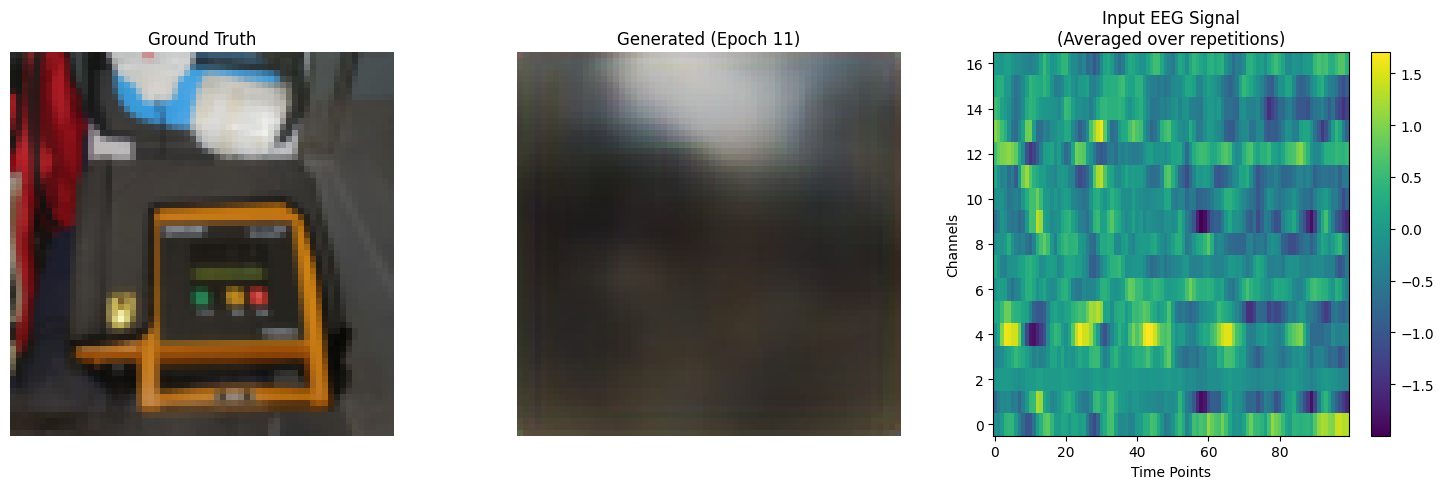

Epoch [12/100] Batch [0/259] D Loss: 0.0106 G Loss: 1193.7361 (Adv: 13.3558, Rec: 0.1180)
Epoch [12/100] Batch [100/259] D Loss: 0.0219 G Loss: 1120.5658 (Adv: 12.4072, Rec: 0.1108)
Epoch [12/100] Batch [200/259] D Loss: 0.0120 G Loss: 1212.9467 (Adv: 12.9608, Rec: 0.1200)


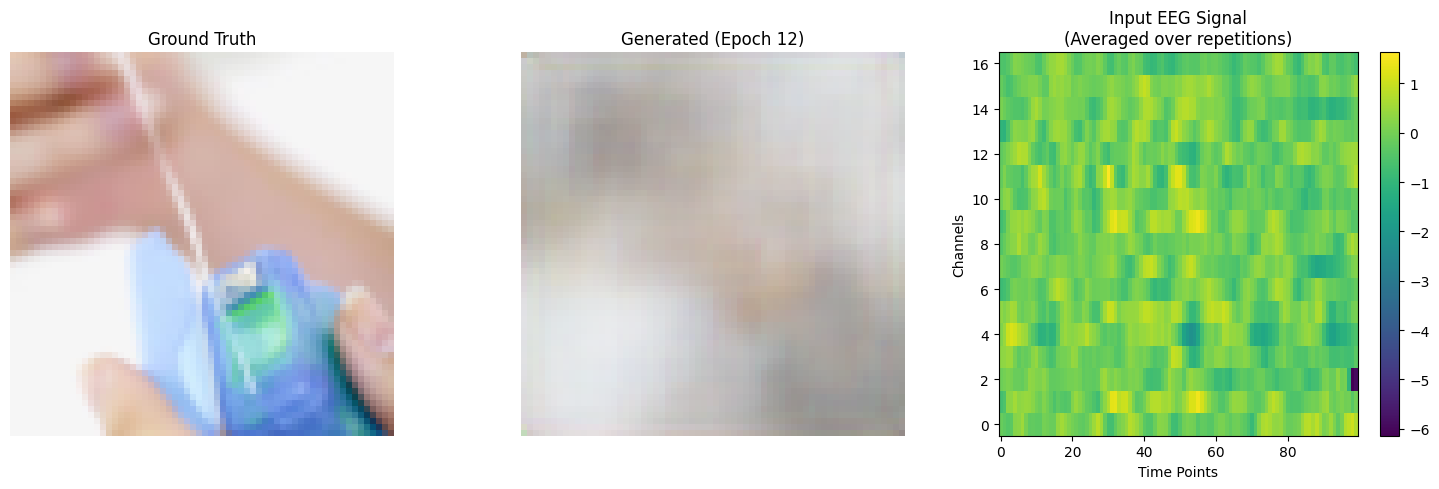

Epoch [13/100] Batch [0/259] D Loss: 0.0077 G Loss: 1100.0305 (Adv: 13.6493, Rec: 0.1086)
Epoch [13/100] Batch [100/259] D Loss: 0.0178 G Loss: 1195.0813 (Adv: 12.7661, Rec: 0.1182)
Epoch [13/100] Batch [200/259] D Loss: 0.0124 G Loss: 1141.2638 (Adv: 12.8204, Rec: 0.1128)


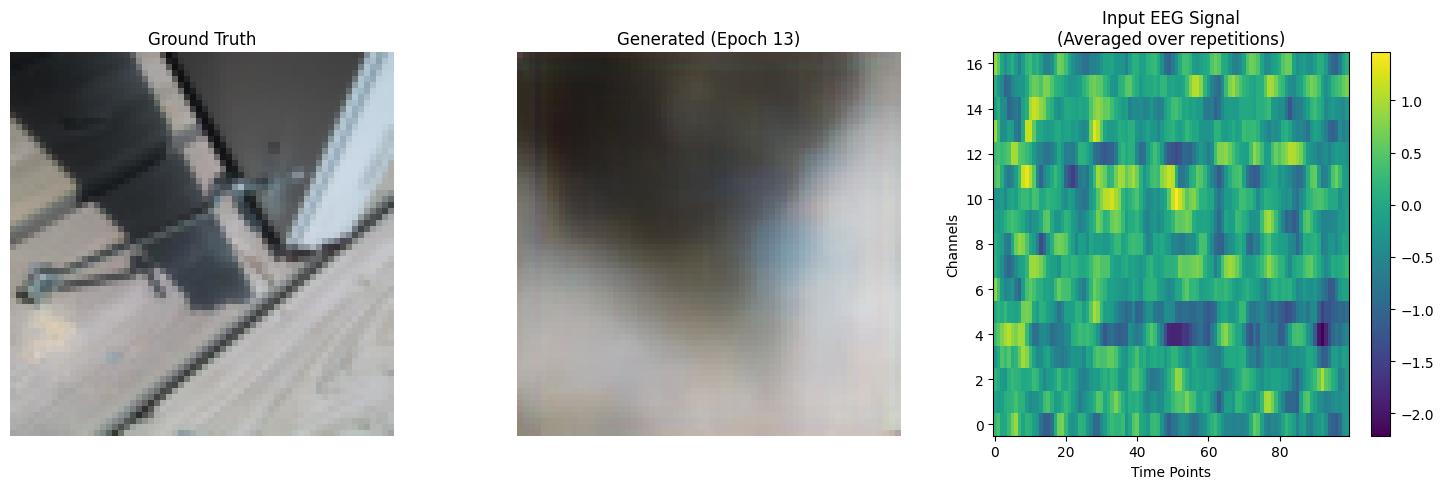

Epoch [14/100] Batch [0/259] D Loss: 0.0150 G Loss: 1003.5701 (Adv: 14.1093, Rec: 0.0989)
Epoch [14/100] Batch [100/259] D Loss: 0.0854 G Loss: 1125.7216 (Adv: 11.8643, Rec: 0.1114)
Epoch [14/100] Batch [200/259] D Loss: 0.0087 G Loss: 1091.2467 (Adv: 13.0319, Rec: 0.1078)


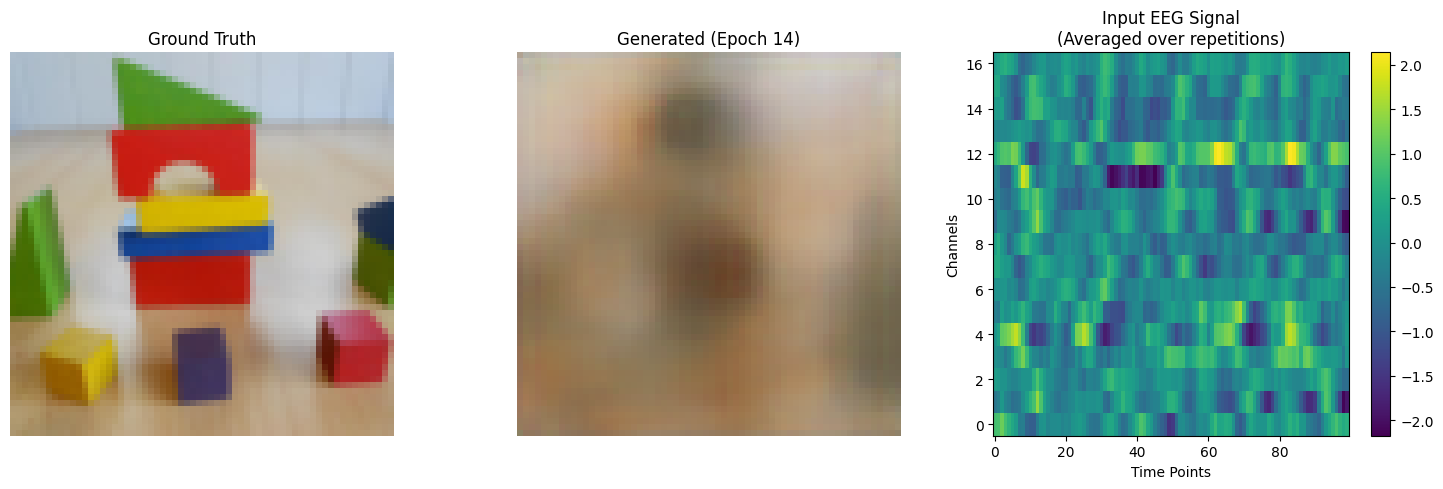

Epoch [15/100] Batch [0/259] D Loss: 0.0072 G Loss: 968.1299 (Adv: 13.8316, Rec: 0.0954)
Epoch [15/100] Batch [100/259] D Loss: 0.0046 G Loss: 1144.6467 (Adv: 14.5580, Rec: 0.1130)
Epoch [15/100] Batch [200/259] D Loss: 0.0055 G Loss: 1098.0718 (Adv: 14.1008, Rec: 0.1084)


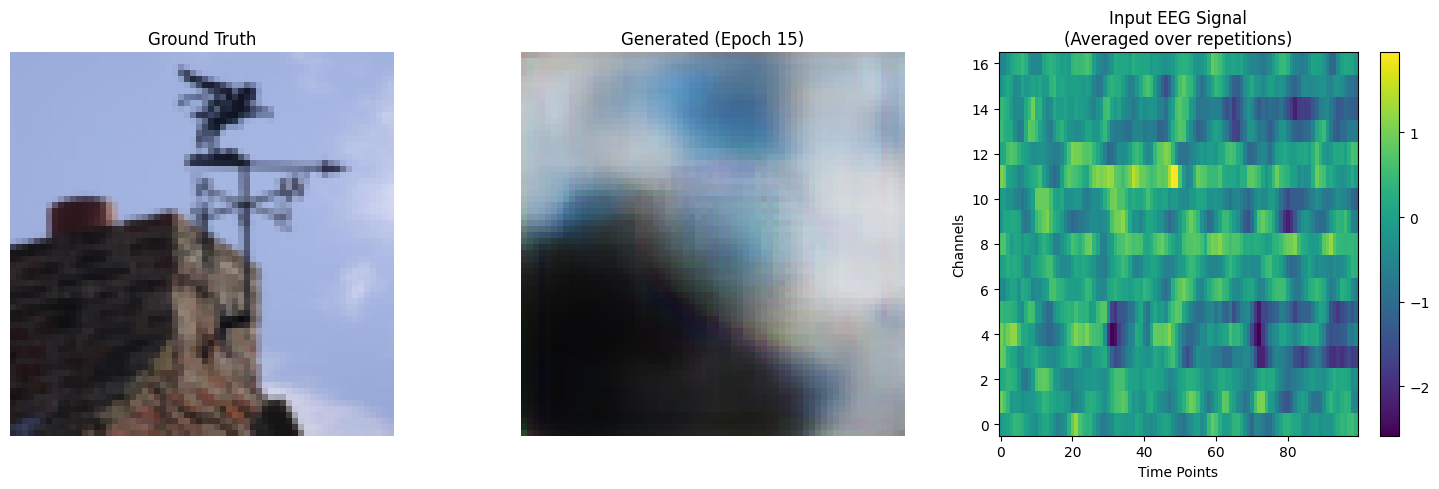

Epoch [16/100] Batch [0/259] D Loss: 0.0092 G Loss: 1015.5173 (Adv: 13.7643, Rec: 0.1002)
Epoch [16/100] Batch [100/259] D Loss: 0.0054 G Loss: 927.7006 (Adv: 13.7625, Rec: 0.0914)
Epoch [16/100] Batch [200/259] D Loss: 0.0042 G Loss: 1289.3303 (Adv: 14.0488, Rec: 0.1275)


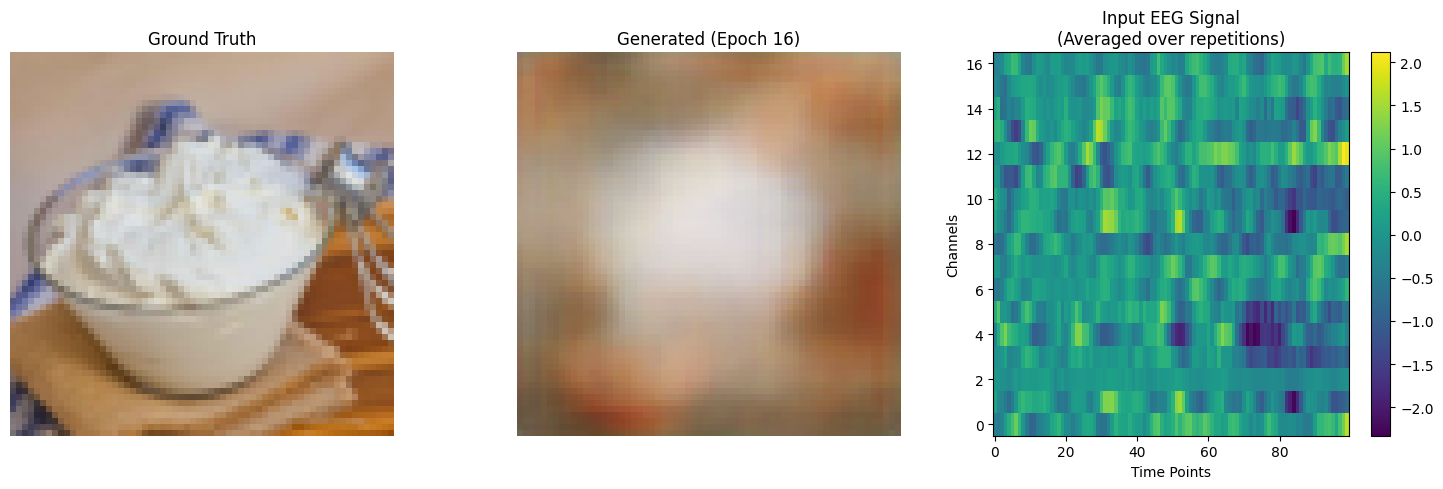

Epoch [17/100] Batch [0/259] D Loss: 0.0063 G Loss: 896.8641 (Adv: 13.9271, Rec: 0.0883)
Epoch [17/100] Batch [100/259] D Loss: 0.0055 G Loss: 1116.7119 (Adv: 14.4812, Rec: 0.1102)
Epoch [17/100] Batch [200/259] D Loss: 0.0046 G Loss: 1132.4442 (Adv: 13.7196, Rec: 0.1119)


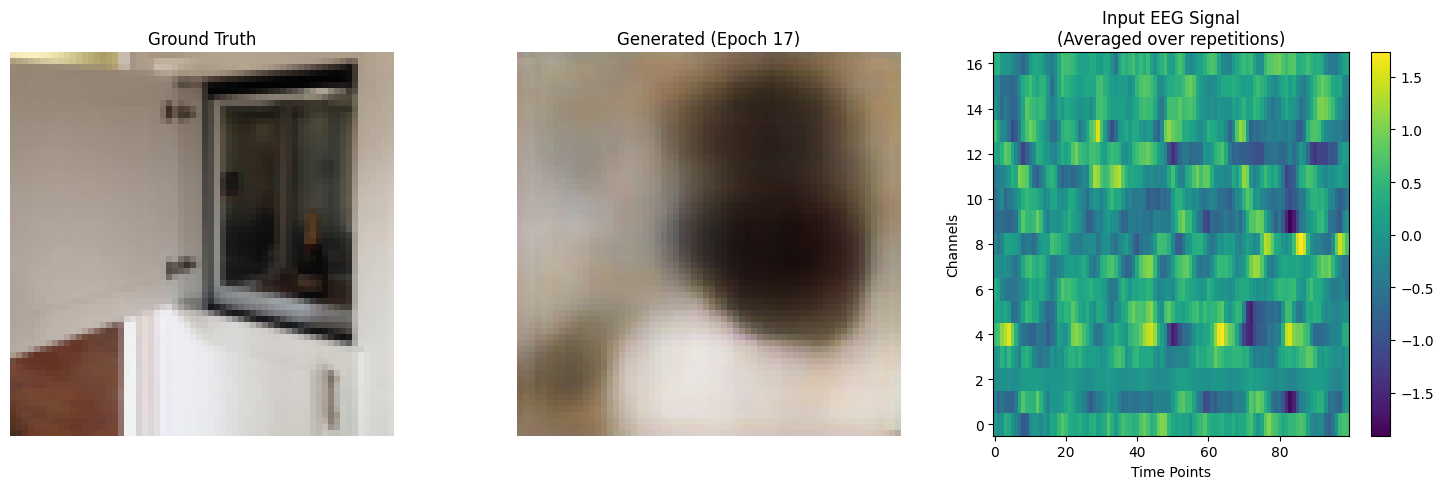

Epoch [18/100] Batch [0/259] D Loss: 0.0036 G Loss: 1079.9789 (Adv: 14.0011, Rec: 0.1066)
Epoch [18/100] Batch [100/259] D Loss: 0.0038 G Loss: 1062.2917 (Adv: 14.5411, Rec: 0.1048)
Epoch [18/100] Batch [200/259] D Loss: 0.0085 G Loss: 1068.2142 (Adv: 14.5247, Rec: 0.1054)


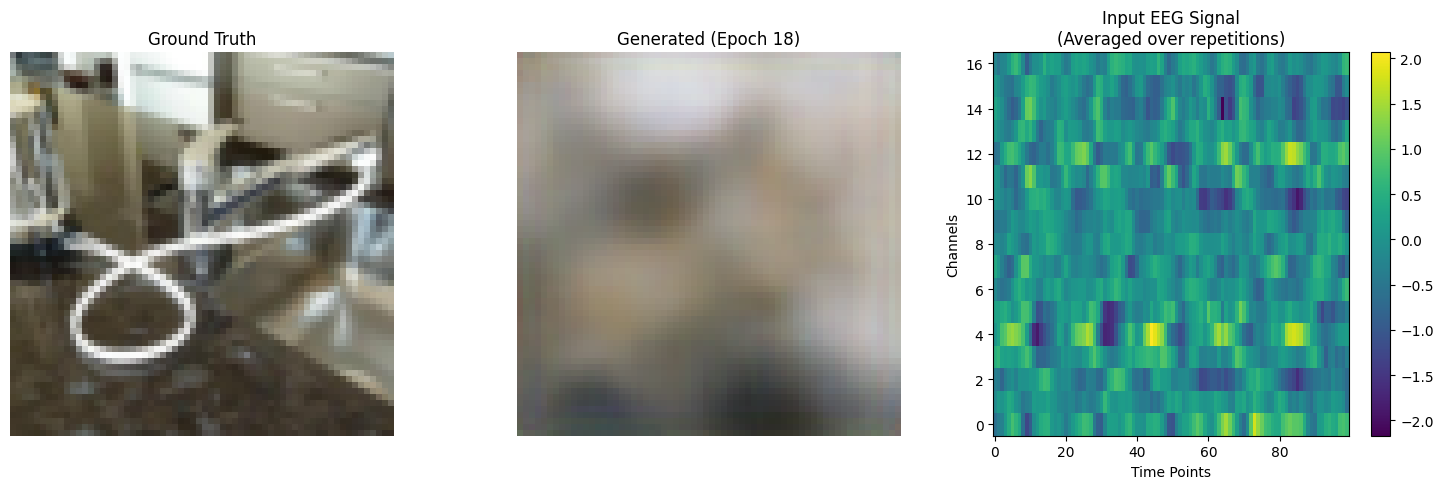

Epoch [19/100] Batch [0/259] D Loss: 0.0032 G Loss: 1051.1377 (Adv: 13.8053, Rec: 0.1037)


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = GeneratorWithSkip() # GeneratorWithSkip() Generator()
discriminator = Discriminator()

generator = generator.to(device)
discriminator = discriminator.to(device)


num_epochs = 100     
lr = 0.0002            
beta1 = 0.5            
lambda_d = 1000

criterion = nn.BCELoss()
reconstruction_loss = nn.MSELoss()
lambda_rec = 10000

optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))


for epoch in range(num_epochs):
    for batch_idx, (eeg_batch, real_images) in enumerate(dataloader):
        batch_size = eeg_batch.size(0)
        
       
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)
        
        eeg_batch = eeg_batch.to(device)
        real_images = real_images.to(device)
        
        ############################
        # Train Discriminator
        ############################
        optimizer_D.zero_grad()
        real_preds = discriminator(real_images)
        d_loss_real = criterion(real_preds, valid)
        
        generated_images = generator(eeg_batch)
        fake_preds = discriminator(generated_images.detach())
        d_loss_fake = criterion(fake_preds, fake)
        
        d_loss = (d_loss_real + d_loss_fake)*lambda_d
        d_loss.backward()
        optimizer_D.step()
        
        ############################
        # Train Generator
        ############################
        optimizer_G.zero_grad()
        
        
        fake_preds = discriminator(generated_images)
        adversarial_loss = criterion(fake_preds, valid)
        
       
        rec_loss = reconstruction_loss(generated_images, real_images)
        
        # Total generator loss.
        g_loss = adversarial_loss + lambda_rec * rec_loss
        g_loss.backward()
        optimizer_G.step()
        
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch [{batch_idx}/{len(dataloader)}] "
                  f"D Loss: {d_loss.item():.4f} G Loss: {g_loss.item():.4f} "
                  f"(Adv: {adversarial_loss.item():.4f}, Rec: {rec_loss.item():.4f})")
    
    
    with torch.no_grad():
        generator.eval()  

       
        sample_eeg = eeg_batch[0].unsqueeze(0)  # Shape: (1, 4, 17, 100)

        # Generate the image.
        gen_img = generator(sample_eeg)
        gen_img_np = (gen_img.squeeze().cpu().numpy().transpose(1, 2, 0) + 1) / 2  # Denormalize to [0,1]

        # Get the ground truth image.
        real_img_np = (real_images[0].cpu().numpy().transpose(1, 2, 0) + 1) / 2  # Denormalize


        eeg_avg = sample_eeg.squeeze(0).mean(dim=0)  # Shape: (17, 100)
        eeg_np = eeg_avg.cpu().numpy()

       
        plt.figure(figsize=(15, 5))

        # Ground truth image.
        plt.subplot(1, 3, 1)
        plt.imshow(real_img_np)
        plt.title("Ground Truth")
        plt.axis('off')

        # Generated image.
        plt.subplot(1, 3, 2)
        plt.imshow(gen_img_np)
        plt.title(f"Generated (Epoch {epoch+1})")
        plt.axis('off')

        # EEG signal as a heatmap.
        plt.subplot(1, 3, 3)
        plt.imshow(eeg_np, aspect='auto', origin='lower', cmap='viridis')
        plt.title("Input EEG Signal\n(Averaged over repetitions)")
        plt.xlabel("Time Points")
        plt.ylabel("Channels")
        plt.colorbar()


        plt.tight_layout()
        plt.show()

        generator.train()  
